In [91]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import linregress
pd.options.mode.chained_assignment = None 

In [92]:
avocado = pd.read_csv("Project Resources/Avocado.csv")
avocado.head()

FileNotFoundError: [Errno 2] File Project Resources/Avocado.csv does not exist: 'Project Resources/Avocado.csv'

In [90]:
hass2020 = pd.read_csv("Project Resources/Hass.csv", thousands=',')
hass2020["Week"] = pd.to_datetime(hass2020["Week"], infer_datetime_format=True, 
                                  format="%Y/%m/%d")
hass2020['Total Volume'] = pd.to_numeric(hass2020['Total Volume'])
hass2020['California'] = pd.to_numeric(hass2020['California'])
hass2020['Chile'] = pd.to_numeric(hass2020['Chile'])
hass2020['Mexico'] = pd.to_numeric(hass2020['Mexico'])
hass2020['Peru'] = pd.to_numeric(hass2020['Peru'])
hass2020['Colombia'] = pd.to_numeric(hass2020['Colombia'])
hass2020.head()

FileNotFoundError: [Errno 2] File Project Resources/Hass.csv does not exist: 'Project Resources/Hass.csv'

In [7]:
hass2020.dtypes

Week            datetime64[ns]
Status                  object
Total Volume             int64
California               int64
Chile                    int64
Mexico                   int64
Peru                     int64
Colombia                 int64
dtype: object

In [8]:
hass2017 =pd.read_csv("Project Resources/2017_Volume_Hass.csv", thousands=',')
hass2017["Week"] = pd.to_datetime(hass2017["Week"], infer_datetime_format=True, 
                                  format="%Y/%m/%d")
hass2017['Total Volume'] = pd.to_numeric(hass2017['Total Volume'])
hass2017['California'] = pd.to_numeric(hass2017['California'])
hass2017['Chile'] = pd.to_numeric(hass2017['Chile'])
hass2017['Mexico'] = pd.to_numeric(hass2017['Mexico'])
hass2017['Peru'] = pd.to_numeric(hass2017['Peru'])
hass2017['Colombia'] = pd.to_numeric(hass2017['Colombia'])
hass2017.head()

,Week,Status,Total Volume,California,Chile,Mexico,Peru,Colombia
0,2017-01-01,Actual,35100521,49737,1023459,34027325,0,0
1,2017-01-08,Actual,40920289,157060,1526467,39236762,0,0
2,2017-01-15,Actual,53723606,215612,1468592,52039402,0,0
3,2017-01-22,Actual,55606793,827113,1445898,53333782,0,0
4,2017-01-29,Actual,44287021,1027998,1111063,42147960,0,0


In [9]:
hass2017.dtypes

Week            datetime64[ns]
Status                  object
Total Volume             int64
California               int64
Chile                    int64
Mexico                   int64
Peru                     int64
Colombia                 int64
dtype: object

In [10]:
hass2018 =pd.read_csv("Project Resources/2018_Volume_Hass.csv", thousands=',')
hass2018["Week"] = pd.to_datetime(hass2018["Week"], infer_datetime_format=True, 
                                  format="%Y/%m/%d")
hass2018['Total Volume'] = pd.to_numeric(hass2018['Total Volume'])
hass2018['California'] = pd.to_numeric(hass2018['California'])
hass2018['Chile'] = pd.to_numeric(hass2018['Chile'])
hass2018['Mexico'] = pd.to_numeric(hass2018['Mexico'])
hass2018['Peru'] = pd.to_numeric(hass2018['Peru'])
hass2018['Colombia'] = pd.to_numeric(hass2018['Colombia'])
hass2018.head()

,Week,Status,Total Volume,California,Chile,Mexico,Peru,Colombia
0,2018-01-07,Actual,45670156,899349,519433,44251374,0,0
1,2018-01-14,Actual,52758905,830821,449003,51479081,0,0
2,2018-01-21,Actual,54698266,2913663,445127,51339476,0,0
3,2018-01-28,Actual,45299201,2698356,95491,42505354,0,0
4,2018-02-04,Actual,47371481,2635471,0,44736010,0,0


In [11]:
hass2019 = pd.read_csv("Project Resources/2019_Volume_Hass.csv", thousands=',')
hass2019["Week"] = pd.to_datetime(hass2019["Week"], infer_datetime_format=True, 
                                  format="%Y/%m/%d")
hass2019['Total Volume'] = pd.to_numeric(hass2019['Total Volume'])
hass2019['California'] = pd.to_numeric(hass2019['California'])
hass2019['Chile'] = pd.to_numeric(hass2019['Chile'])
hass2019['Mexico'] = pd.to_numeric(hass2019['Mexico'])
hass2019['Peru'] = pd.to_numeric(hass2019['Peru'])
hass2019['Colombia'] = pd.to_numeric(hass2019['Colombia'])
hass2019.head()

,Week,Status,Total Volume,California,Chile,Mexico,Peru,Colombia
0,2019-01-06,Actual,39644522,0,1111244,38533278,0,0
1,2019-01-13,Actual,73115987,71558,1154459,71889970,0,0
2,2019-01-20,Actual,73262502,35452,681725,72545325,0,0
3,2019-01-27,Actual,59200492,306018,676866,58217608,0,0
4,2019-02-03,Actual,45231823,225945,584756,44421122,0,0


In [12]:
hass = pd.concat([hass2020, hass2017, hass2018, hass2019], axis=0, join="outer", ignore_index=False)
hass.head()

,Week,Status,Total Volume,California,Chile,Mexico,Peru,Colombia
0,2020-01-05,Actual,32537444,37220,159041,32291182,0,50000
1,2020-01-12,Actual,65307572,319866,177780,64809925,0,0
2,2020-01-19,Actual,76375629,1604707,222755,74498167,0,50000
3,2020-01-26,Actual,66647112,2822485,0,63774627,0,50000
4,2020-02-02,Actual,45414983,2704489,0,42710494,0,0


In [13]:
cln_hass = hass.loc[hass['Status'] == "Actual"]
cln_hass.head()

,Week,Status,Total Volume,California,Chile,Mexico,Peru,Colombia
0,2020-01-05,Actual,32537444,37220,159041,32291182,0,50000
1,2020-01-12,Actual,65307572,319866,177780,64809925,0,0
2,2020-01-19,Actual,76375629,1604707,222755,74498167,0,50000
3,2020-01-26,Actual,66647112,2822485,0,63774627,0,50000
4,2020-02-02,Actual,45414983,2704489,0,42710494,0,0


In [14]:
cln_hass.dtypes

Week            datetime64[ns]
Status                  object
Total Volume             int64
California               int64
Chile                    int64
Mexico                   int64
Peru                     int64
Colombia                 int64
dtype: object

In [15]:
Tot_Cali2017 = hass2017["California"].sum()
Tot_Cali2018 = hass2018["California"].sum()
Tot_Cali2019 = hass2019["California"].sum()
Tot_Cali2020 = hass2020["California"].sum()
Tot_Cali = Tot_Cali2017 + Tot_Cali2018 + Tot_Cali2019 + Tot_Cali2020

Tot_Chile2017 = hass2017["Chile"].sum()
Tot_Chile2018 = hass2018["Chile"].sum()
Tot_Chile2019 = hass2019["Chile"].sum()
Tot_Chile2020 = hass2020["Chile"].sum()
Tot_Chile = Tot_Chile2017 + Tot_Chile2018 + Tot_Chile2019 +Tot_Chile2020

Tot_Mex2017 = hass2017["Mexico"].sum()
Tot_Mex2018 = hass2018["Mexico"].sum()
Tot_Mex2019 = hass2019["Mexico"].sum()
Tot_Mex2020 = hass2020["Mexico"].sum()
Tot_Mex = Tot_Mex2017 + Tot_Mex2018 + Tot_Mex2019 + Tot_Mex2020

Tot_Peru2017 = hass2017["Peru"].sum()
Tot_Peru2018 = hass2018["Peru"].sum()
Tot_Peru2019 = hass2019["Peru"].sum()
Tot_Peru2020 = hass2020["Peru"].sum()
Tot_Peru = Tot_Peru2017 + Tot_Peru2018 + Tot_Peru2019 + Tot_Peru2020

Tot_Colo2017 = hass2017["Colombia"].sum()
Tot_Colo2018 = hass2018["Colombia"].sum()
Tot_Colo2019 = hass2019["Colombia"].sum()
Tot_Colo2020 = hass2020["Colombia"].sum()
Tot_Colo = Tot_Colo2017 + Tot_Colo2018 + Tot_Colo2019 + Tot_Colo2020

In [73]:
TotV_Coun = pd.DataFrame({"":["California", "Chile", "Colombia", "Mexico", "Peru"],
                        "2017":[Tot_Cali2017, Tot_Chile2017, Tot_Colo2017, 
                                      Tot_Mex2017, Tot_Peru2017],
                        "2018": [Tot_Cali2018, Tot_Chile2018, Tot_Colo2018, 
                                      Tot_Mex2018, Tot_Peru2018],
                        "2019":[Tot_Cali2019, Tot_Chile2019, Tot_Colo2019, 
                                      Tot_Mex2019, Tot_Peru2019],
                        "2020 (thru 7/14/2020)": [Tot_Cali2020, Tot_Chile2020, Tot_Colo2020, 
                                      Tot_Mex2020, Tot_Peru2020],
                        "Total": [Tot_Cali, Tot_Chile, Tot_Colo, 
                                      Tot_Mex, Tot_Peru]})
TotV_Coun = TotV_Coun.set_index("")
# TotV_Coun["2017"] = TotV_Coun["2017"].map("{:,}".format)
# TotV_Coun["2018"] = TotV_Coun["2018"].map("{:,}".format)
# TotV_Coun["2019"] = TotV_Coun["2019"].map("{:,}".format)
# TotV_Coun["2020 (thru 7/14/2020)"] = TotV_Coun["2020 (thru 7/14/2020)"].map("{:,}".format)
# TotV_Coun["Total"] = TotV_Coun["Total"].map("{:,}".format)
TotV_Coun.head()

,2017,2018,2019,2020 (thru 7/14/2020),Total
,,,,,
California,202077261,312759562,203914246,361163718,1079914787
Chile,80895572,58117187,32605791,559576,172178126
Colombia,0,0,50000,1140000,1190000
Mexico,1734117320,1988133064,2145526431,1693819860,7561596675
Peru,141663747,181231912,183265197,197837369,703998225


In [26]:
TotV_Coun.dtypes

2017                     int64
2018                     int64
2019                     int64
2020 (thru 7/14/2020)    int64
Total                    int64
dtype: object

In [38]:
TotV_Yr = pd.DataFrame({"":["2017", "2018", "2019", "2020 (Thru 7/14/2020)", "Total"],
                        "California":[Tot_Cali2017, Tot_Cali2018, Tot_Cali2019, 
                                      Tot_Cali2020, Tot_Cali],
                        "Chile": [Tot_Chile2017, Tot_Chile2018, Tot_Chile2019,
                                  Tot_Chile2020, Tot_Chile],
                        "Mexico":[Tot_Mex2017, Tot_Mex2018, Tot_Mex2019, 
                                  Tot_Mex2020, Tot_Mex],
                        "Peru": [Tot_Peru2017, Tot_Peru2018, Tot_Peru2019, 
                                 Tot_Peru2020, Tot_Peru],
                        "Colombia": [Tot_Colo2017, Tot_Colo2018, Tot_Colo2019, 
                                     Tot_Colo2020, Tot_Colo]})
TotV_Yr = TotV_Yr.set_index("")
TotV_Yr["California"] = TotV_Yr["California"].map("{:,}".format)
TotV_Yr["Chile"] = TotV_Yr["Chile"].map("{:,}".format)
TotV_Yr["Mexico"] = TotV_Yr["Mexico"].map("{:,}".format)
TotV_Yr["Peru"] = TotV_Yr["Peru"].map("{:,}".format)
TotV_Yr["Colombia"] = TotV_Yr["Colombia"].map("{:,}".format)
TotV_Yr.head()

,California,Chile,Mexico,Peru,Colombia
,,,,,
2017,"202,077,261","80,895,572","1,734,117,320","141,663,747",0
2018,"312,759,562","58,117,187","1,988,133,064","181,231,912",0
2019,"203,914,246","32,605,791","2,145,526,431","183,265,197","50,000"
2020 (Thru 7/14/2020),"361,163,718","559,576","1,693,819,860","197,837,369","1,140,000"
Total,"1,079,914,787","172,178,126","7,561,596,675","703,998,225","1,190,000"


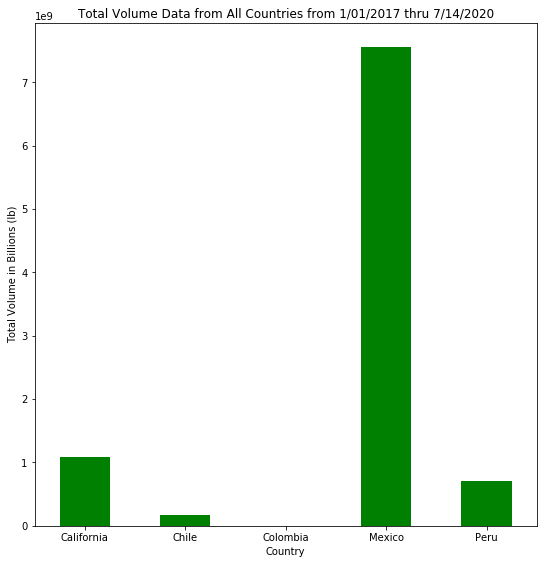

In [87]:
tots = TotV_Coun["Total"]
plt.figure(figsize=(9,9.25))
tots.plot(kind="bar", facecolor="green", rot=0)
plt.title("Total Volume Data from All Countries from 1/01/2017 thru 7/14/2020")
plt.xlabel("Country")
plt.ylabel("Total Volume in Billions (lb)")
plt.savefig("total_avocado_bar.png")
plt.show() 

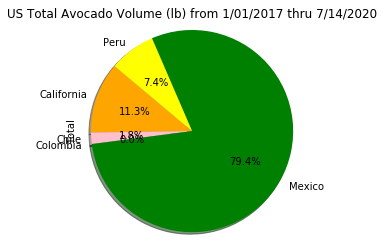

In [63]:
%matplotlib inline
tots = TotV_Coun["Total"]
countries = TotV_Coun.index.values
colors = ["orange","pink","blue", "green","yellow"]
plt.figure(figsize=(4,4))
tots.plot(kind="pie", y=countries, title ="US Total Avocado Volume (lb) from 1/01/2017 thru 7/14/2020",
               colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("total_avocado_pie.png")
plt.show()

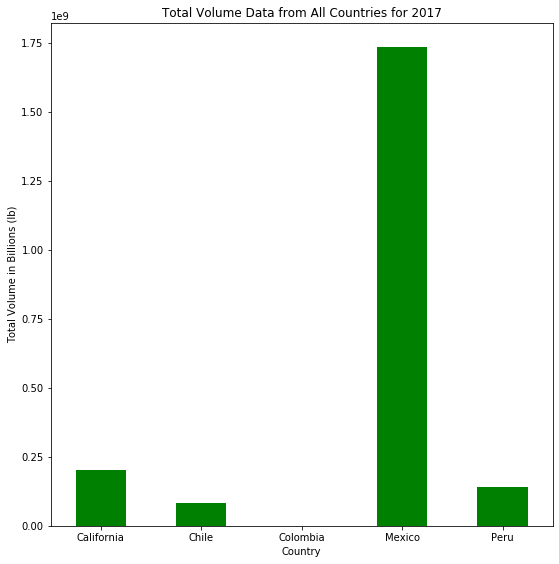

In [64]:
tots = TotV_Coun["2017"]
plt.figure(figsize=(9,9.25))
tots.plot(kind="bar", facecolor="green", rot=0)
plt.title("Total Volume Data from All Countries for 2017")
plt.xlabel("Country")
plt.ylabel("Total Volume in Billions (lb)")
plt.savefig("total_avocado_bar2017.png")
plt.show()

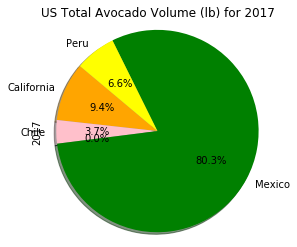

In [66]:
%matplotlib inline
tots = TotV_Coun["2017"]
countries = TotV_Coun.index.values
colors = ["orange","pink","blue", "green","yellow"]
plt.figure(figsize=(4,4))
tots.plot(kind="pie", y=countries, title ="US Total Avocado Volume (lb) for 2017",
               colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("total_avocado_pie2017.png")
plt.show()

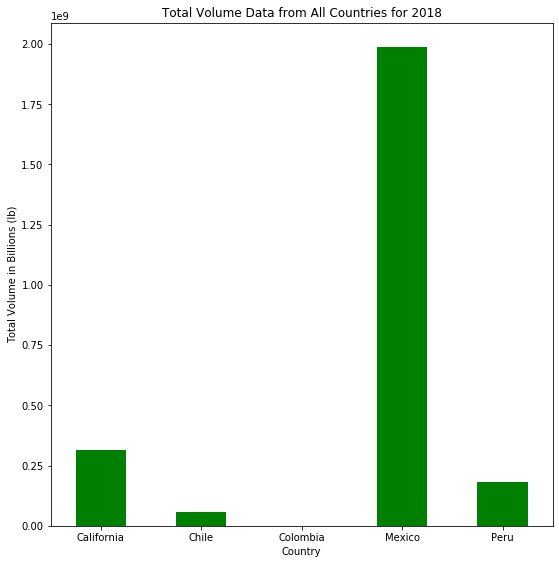

In [67]:
tots = TotV_Coun["2018"]
plt.figure(figsize=(9,9.25))
tots.plot(kind="bar", facecolor="green", rot=0)
plt.title("Total Volume Data from All Countries for 2018")
plt.xlabel("Country")
plt.ylabel("Total Volume in Billions (lb)")
plt.savefig("total_avocado_bar2018.png")
plt.show()

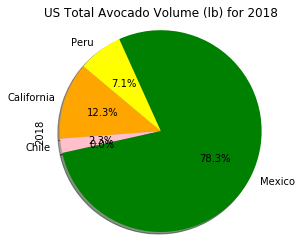

In [68]:
%matplotlib inline
tots = TotV_Coun["2018"]
countries = TotV_Coun.index.values
colors = ["orange","pink","blue", "green","yellow"]
plt.figure(figsize=(4,4))
tots.plot(kind="pie", y=countries, title ="US Total Avocado Volume (lb) for 2018",
               colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("total_avocado_pie2018.png")
plt.show()

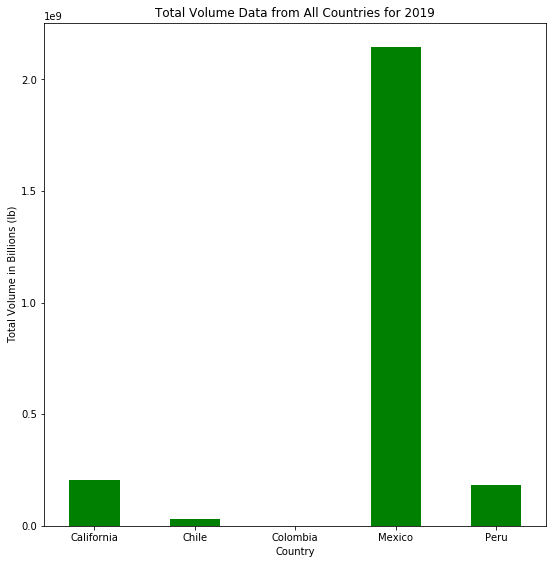

In [69]:
tots = TotV_Coun["2019"]
plt.figure(figsize=(9,9.25))
tots.plot(kind="bar", facecolor="green", rot=0)
plt.title("Total Volume Data from All Countries for 2019")
plt.xlabel("Country")
plt.ylabel("Total Volume in Billions (lb)")
plt.savefig("total_avocado_bar2019.png")
plt.show()

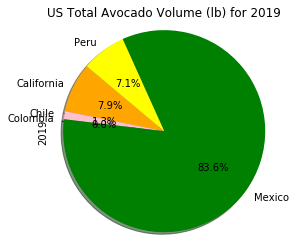

In [70]:
%matplotlib inline
tots = TotV_Coun["2019"]
countries = TotV_Coun.index.values
colors = ["orange","pink","blue", "green","yellow"]
plt.figure(figsize=(4,4))
tots.plot(kind="pie", y=countries, title ="US Total Avocado Volume (lb) for 2019",
               colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("total_avocado_pie2019.png")
plt.show()

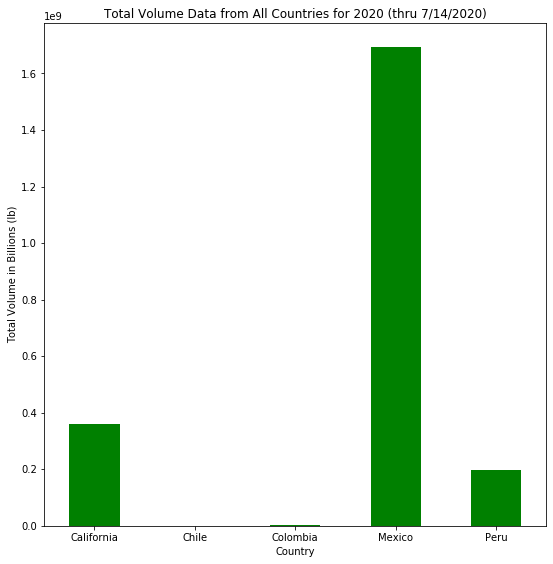

In [75]:
tots = TotV_Coun["2020 (thru 7/14/2020)"]
plt.figure(figsize=(9,9.25))
tots.plot(kind="bar", facecolor="green", rot=0)
plt.title("Total Volume Data from All Countries for 2020 (thru 7/14/2020)")
plt.xlabel("Country")
plt.ylabel("Total Volume in Billions (lb)")
plt.savefig("total_avocado_bar2020.png")
plt.show()

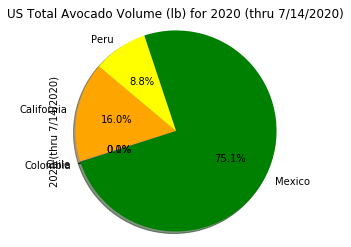

In [77]:
%matplotlib inline
tots = TotV_Coun["2020 (thru 7/14/2020)"]
countries = TotV_Coun.index.values
colors = ["orange","pink","blue", "green","yellow"]
plt.figure(figsize=(4,4))
tots.plot(kind="pie", y=countries, title ="US Total Avocado Volume (lb) for 2020 (thru 7/14/2020)",
               colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("total_avocado_pie2020.png")
plt.show()